In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
from matplotlib.pyplot import figure

In [2]:
#Import csvs as df
eada = pd.read_csv('../Data Transform/EADA_2019_filtered_coord.csv')
school_geo = pd.read_csv('../Data Transform/school_geo.csv')
mlb_geo = pd.read_csv('../Data Transform/dataMLB.csv')
nba_geo = pd.read_csv('../Data Transform/dataNBA.csv')

In [3]:
eada

,unitid,institution_name,addr1_txt,addr2_txt,city_txt,state_cd,zip_text,ClassificationCode,classification_name,ClassificationOther,...,GRND_TOTAL_REVENUE,GRND_TOTAL_EXPENSE,OPEXPPERTEAM_MEN_Baseball,OPEXPPERTEAM_MEN_Bskball,REV_MEN_Baseball,REV_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball,lat,lon
0,100654,Alabama A & M University,4900 Meridian Street,NaN,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,...,13790500,13626724,171178.0,184268.0,608854.0,1591652.0,588354.0,1667122.0,34.782600,-86.568700
1,100706,University of Alabama in Huntsville,301 Sparkman Dr,NaN,Huntsville,AL,35899.0,5,NCAA Division II without football,NaN,...,7781027,7781027,173401.0,143803.0,541784.0,705934.0,541784.0,705934.0,34.725000,-86.640000
2,100724,Alabama State University,915 S Jackson Street,NaN,Montgomery,AL,36104.0,2,NCAA Division I-FCS,NaN,...,11639722,11639722,72110.0,180911.0,628125.0,992694.0,628125.0,992694.0,32.364000,-86.295000
3,100751,The University of Alabama,739 University Blvd,NaN,Tuscaloosa,AL,35487.0,1,NCAA Division I-FBS,NaN,...,166812799,166812799,1166447.0,1457096.0,2016412.0,16028795.0,4173211.0,15966875.0,33.210833,-87.546111
4,100760,Central Alabama Community College,1675 Cherokee Rd,NaN,Alexander City,AL,35010.0,12,NJCAA Division I,NaN,...,906077,889789,61904.0,NaN,318500.0,NaN,308353.0,NaN,32.926230,-85.946490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,486901,Milligan College,1 Blowers Blvd.,NaN,Milligan College,TN,37682.0,10,NAIA Division II,NaN,...,5501770,5458939,60654.0,28928.0,601223.0,400392.0,601197.0,377672.0,36.301700,-82.295100
1805,487524,Husson University,1 College Circle,NaN,Bangor,ME,4401.0,6,NCAA Division III with football,NaN,...,2955721,2955721,106791.0,91996.0,142626.0,140394.0,135573.0,116686.0,44.826964,-68.793222
1806,488785,University of Saint Katherine,1637 Capalina Road,NaN,San Marcos,CA,92069.0,15,NCCAA Division I,NaN,...,2701639,2701639,48084.0,54935.0,923581.0,116259.0,504014.0,328106.0,33.048100,-117.277500
1807,489937,Piedmont International University,420 S. Broad St.,NaN,Winston-Salem,NC,27101.0,15,NCCAA Division I,NaN,...,2169500,2169500,57488.0,46276.0,402973.0,328353.0,367526.0,345939.0,36.087900,-80.250100


In [25]:
school_geo

,unitid,institution_name,region,nearest_mlb,nearest_mlb_dist,nearest_nba,nearest_nba_dist
0,100654,Alabama A & M University,ESC,Atlanta Braves,134.784204,Atlanta Hawks,142.837358
1,100706,University of Alabama in Huntsville,ESC,Atlanta Braves,136.725585,Atlanta Hawks,144.541163
2,100724,Alabama State University,ESC,Atlanta Braves,149.301421,Atlanta Hawks,146.123655
3,100751,The University of Alabama,ESC,Atlanta Braves,183.343203,Atlanta Hawks,185.384011
4,100760,Central Alabama Community College,ESC,Atlanta Braves,108.192247,Atlanta Hawks,106.309279
...,...,...,...,...,...,...,...
1803,486840,Kennesaw State University,SA,Atlanta Braves,12.165402,Atlanta Hawks,22.156078
1804,486901,Milligan College,ESC,Atlanta Braves,207.000900,Charlotte Hornets,110.438350
1805,487524,Husson University,NE,Boston Red Sox,206.571128,Boston Celtics,204.420617
1806,488785,University of Saint Katherine,PAC,San Diego Padres,24.569881,Los Angeles Clippers,89.296935


In [5]:
#Drop cols shared by school_geo and eada before merge
school_geo.drop(columns = ['state_cd', 'lat', 'lon'], inplace = True)

In [6]:
#Merge dfs
joined_df = eada.merge(right = school_geo, on = ['unitid', 'institution_name'])
joined_df.head()

,unitid,institution_name,addr1_txt,addr2_txt,city_txt,state_cd,zip_text,ClassificationCode,classification_name,ClassificationOther,...,REV_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball,lat,lon,region,nearest_mlb,nearest_mlb_dist,nearest_nba,nearest_nba_dist
0,100654,Alabama A & M University,4900 Meridian Street,NaN,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,...,1591652.0,588354.0,1667122.0,34.782600,-86.568700,ESC,Atlanta Braves,134.784204,Atlanta Hawks,142.837358
1,100706,University of Alabama in Huntsville,301 Sparkman Dr,NaN,Huntsville,AL,35899.0,5,NCAA Division II without football,NaN,...,705934.0,541784.0,705934.0,34.725000,-86.640000,ESC,Atlanta Braves,136.725585,Atlanta Hawks,144.541163
2,100724,Alabama State University,915 S Jackson Street,NaN,Montgomery,AL,36104.0,2,NCAA Division I-FCS,NaN,...,992694.0,628125.0,992694.0,32.364000,-86.295000,ESC,Atlanta Braves,149.301421,Atlanta Hawks,146.123655
3,100751,The University of Alabama,739 University Blvd,NaN,Tuscaloosa,AL,35487.0,1,NCAA Division I-FBS,NaN,...,16028795.0,4173211.0,15966875.0,33.210833,-87.546111,ESC,Atlanta Braves,183.343203,Atlanta Hawks,185.384011
4,100760,Central Alabama Community College,1675 Cherokee Rd,NaN,Alexander City,AL,35010.0,12,NJCAA Division I,NaN,...,NaN,308353.0,NaN,32.926230,-85.946490,ESC,Atlanta Braves,108.192247,Atlanta Hawks,106.309279


In [7]:
joined_df.columns

Index(['unitid', 'institution_name', 'addr1_txt', 'addr2_txt', 'city_txt',
       'state_cd', 'zip_text', 'ClassificationCode', 'classification_name',
       'ClassificationOther', 'EFMaleCount', 'EFFemaleCount', 'EFTotalCount',
       'sector_cd', 'sector_name', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'lat', 'lon', 'region',
       'nearest_mlb', 'nearest_mlb_dist', 'nearest_nba', 'nearest_nba_dist'],
      dtype='object')

In [8]:
joined_df['region'].value_counts()

SA     301
MA     293
ENC    255
PAC    233
WNC    193
WSC    174
ESC    130
NE     118
MNT     89
oth     22
Name: region, dtype: int64

In [9]:
#Drop colleges with region = oth
joined_df.drop(index = joined_df.loc[joined_df['region'] == 'oth'].index, inplace = True)
joined_df['region'].value_counts()

SA     301
MA     293
ENC    255
PAC    233
WNC    193
WSC    174
ESC    130
NE     118
MNT     89
Name: region, dtype: int64

In [10]:
joined_df['classification_name'].value_counts()

NCAA Division III with football       212
NJCAA Division I                      187
NCAA Division III without football    159
NCAA Division II with football        151
NCAA Division I-FBS                   122
NCAA Division I-FCS                   119
NCAA Division II without football     119
NAIA Division II                      105
NJCAA Division III                     98
CCCAA                                  96
NCAA Division I without football       93
NAIA Division I                        91
NJCAA Division II                      91
USCAA                                  38
Other                                  38
NWAC                                   29
NCCAA Division II                      23
Independent                             8
NCCAA Division I                        7
Name: classification_name, dtype: int64

In [11]:
joined_df['EFTotalCount'].describe()

count     1786.000000
mean      4423.599664
std       6067.746419
min          0.000000
25%       1117.250000
50%       2101.000000
75%       4926.000000
max      47253.000000
Name: EFTotalCount, dtype: float64

In [12]:
joined_df[['GRND_TOTAL_REVENUE', 'REV_MEN_Baseball', 'REV_MEN_Bskball']].describe()

,GRND_TOTAL_REVENUE,REV_MEN_Baseball,REV_MEN_Bskball
count,1.786000e+03,1.465000e+03,1.701000e+03
mean,1.058183e+07,4.723437e+05,1.251085e+06
std,2.426890e+07,6.563423e+05,3.444076e+06
min,8.480000e+03,1.400500e+04,8.238000e+03
25%,1.140332e+06,1.414760e+05,1.105950e+05
50%,3.271416e+06,2.699770e+05,2.509910e+05
75%,7.780434e+06,5.559280e+05,6.761470e+05
max,2.158291e+08,7.466680e+06,4.275925e+07


In [13]:
joined_df[['OPEXPPERTEAM_MEN_Baseball', 'OPEXPPERTEAM_MEN_Bskball', 'EXP_MEN_Baseball', 'EXP_MEN_Bskball']].describe()

,OPEXPPERTEAM_MEN_Baseball,OPEXPPERTEAM_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball
count,1.465000e+03,1.717000e+03,1.465000e+03,1.701000e+03
mean,1.414884e+05,2.172093e+05,5.266065e+05,1.051856e+06
std,2.184511e+05,5.130440e+05,7.864564e+05,2.347468e+06
min,2.109000e+03,0.000000e+00,1.400500e+04,6.550000e+03
25%,4.459700e+04,3.088400e+04,1.404140e+05,1.077360e+05
50%,7.462600e+04,5.222900e+04,2.685720e+05,2.468250e+05
75%,1.354930e+05,1.083510e+05,5.642170e+05,6.575100e+05
max,2.984274e+06,6.255125e+06,7.466680e+06,2.217847e+07


In [14]:
joined_df[['nearest_mlb_dist', 'nearest_nba_dist']].describe()

,nearest_mlb_dist,nearest_nba_dist
count,1786.000000,1786.000000
mean,114.641808,105.977360
std,98.854282,86.504347
min,0.251973,0.116321
25%,29.059698,35.590049
50%,94.504060,93.818890
75%,175.835797,151.886548
max,586.827657,547.945347


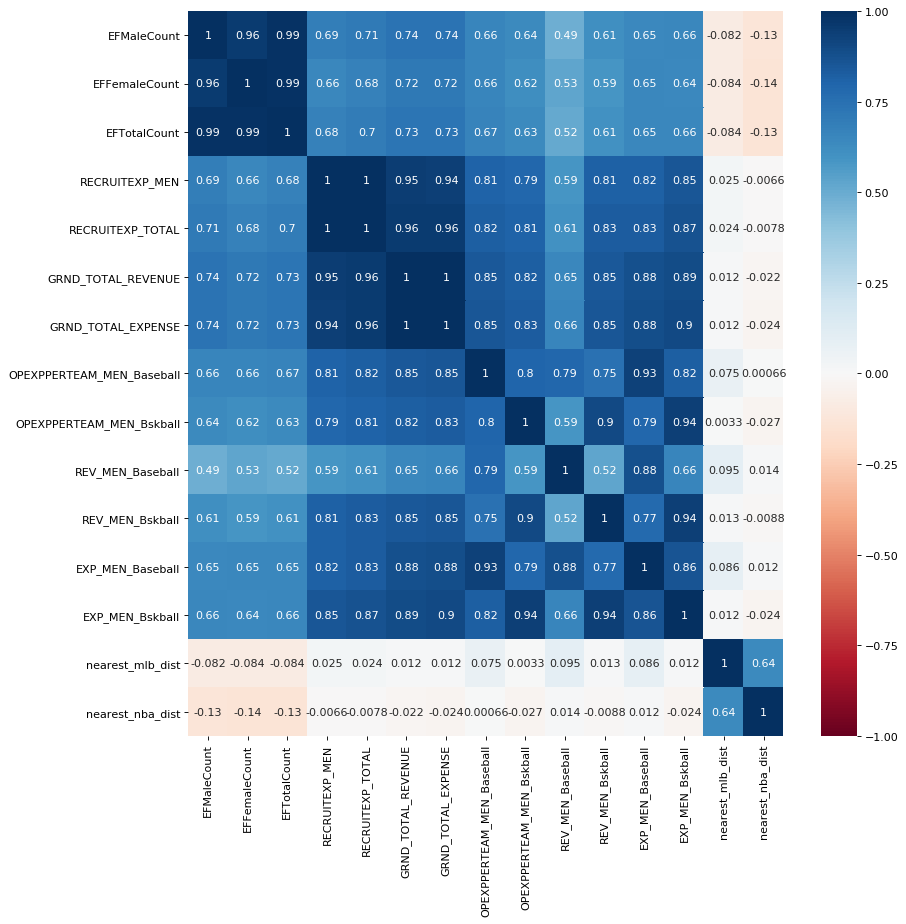

In [15]:
#Adapted from https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib;
# and https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

#Plot heatmap for all schools 
figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(joined_df[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1, vmax = 1)

mp.show()

In [16]:
#Group all schools by region
all_region = joined_df.groupby(joined_df['region']).mean()
all_region

,unitid,zip_text,ClassificationCode,EFMaleCount,EFFemaleCount,EFTotalCount,sector_cd,RECRUITEXP_MEN,RECRUITEXP_TOTAL,GRND_TOTAL_REVENUE,...,OPEXPPERTEAM_MEN_Baseball,OPEXPPERTEAM_MEN_Bskball,REV_MEN_Baseball,REV_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball,lat,lon,nearest_mlb_dist,nearest_nba_dist
region,,,,,,,,,,,,,,,,,,,,,
ENC,180960.152941,1.646633e+07,7.984314,2012.223529,2238.854902,4251.078431,2.262745,117379.224409,167615.454902,1.063578e+07,...,120407.463636,241003.987854,348114.450000,1.485047e+06,420803.386364,1.054368e+06,41.403521,-86.300727,72.681428,84.306311
ESC,170918.315385,3.071798e+06,7.569231,1663.553846,2196.438462,3859.992308,2.269231,167032.146154,230617.453846,1.396994e+07,...,190622.099174,269131.204724,655231.842975,1.951978e+06,762224.338843,1.485403e+06,34.808566,-86.801470,190.081852,135.443697
MA,204649.081911,3.311691e+06,8.300341,1881.989761,2168.341297,4050.331058,2.177474,71349.321918,106943.122867,6.647990e+06,...,85538.268085,143535.652921,267885.336170,7.506702e+05,266936.748936,6.655176e+05,41.184124,-75.910997,60.106977,71.080483
MNT,172453.157303,1.641967e+07,7.235955,2829.775281,3050.471910,5880.247191,2.247191,157069.797753,229228.573034,1.397804e+07,...,176358.673077,321997.500000,563864.653846,1.784345e+06,671057.711538,1.542315e+06,38.901161,-109.077923,223.399037,177.859065
NE,172053.567797,4.773170e+05,7.271186,1777.177966,2056.559322,3833.737288,1.983051,95565.720339,146233.779661,8.825769e+06,...,109614.121212,169615.448276,335452.828283,7.748417e+05,333481.888889,7.655124e+05,42.631769,-71.558290,69.628756,70.852953
PAC,164617.351931,8.065497e+06,12.012876,2626.622318,3149.175966,5775.798283,2.811159,77858.150215,117601.596567,8.716355e+06,...,144575.138298,172514.623318,468911.372340,8.980901e+05,525648.696809,8.626808e+05,38.548888,-120.222935,73.049289,75.905695
SA,193431.242525,1.117201e+06,6.890365,2137.345515,2653.903654,4791.249169,1.930233,160315.959322,217428.770764,1.322324e+07,...,164044.413934,270073.214789,630326.315574,1.549508e+06,698569.377049,1.354423e+06,34.709583,-80.359360,134.119748,92.908230
WNC,176333.818653,6.119021e+06,8.652850,1328.279793,1478.746114,2807.025907,2.336788,102297.481675,144788.932642,8.799245e+06,...,120756.324675,172233.276596,387809.941558,1.064881e+06,449726.805195,8.382072e+05,41.782575,-94.885977,150.449636,216.942642
WSC,203094.971264,8.392515e+06,7.229885,2120.183908,2607.241379,4727.425287,2.195402,176047.612717,239677.310345,1.395534e+07,...,209198.427632,276866.638037,716801.276316,1.509474e+06,773039.703947,1.353664e+06,32.791190,-96.125317,168.784509,101.331919


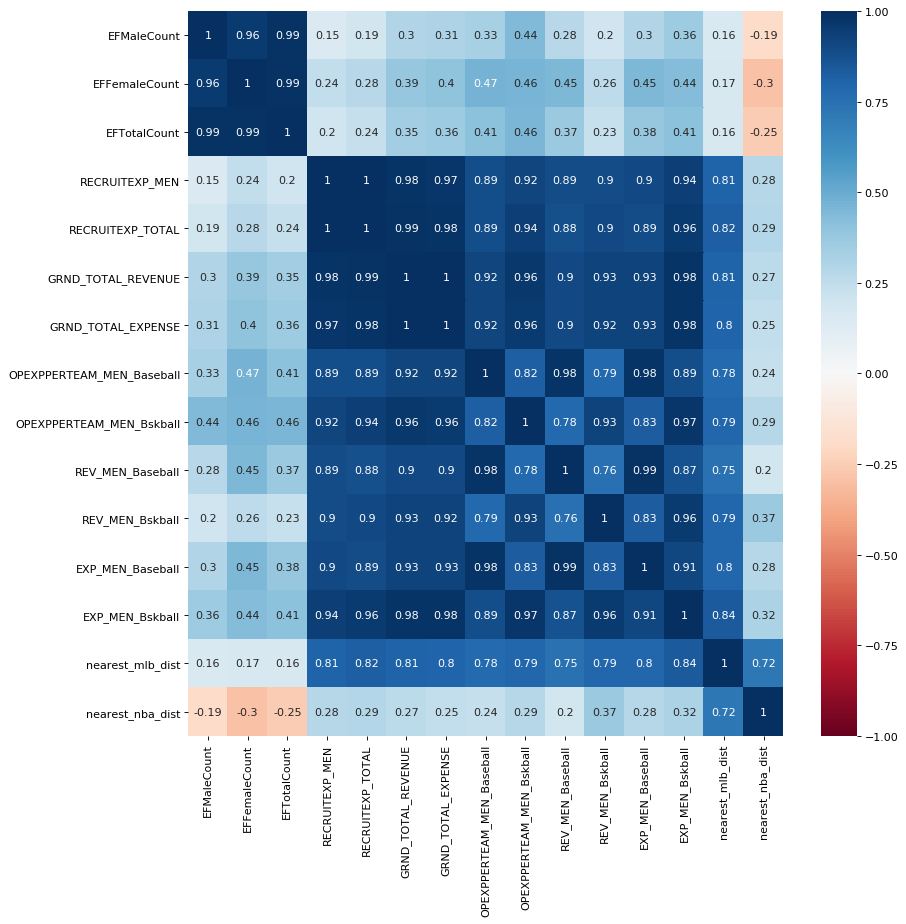

In [17]:
#Create heatmap for all schools grouped by region 
figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(all_region[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1)

mp.show()

In [18]:
#Crete df of only NCAA div 1 schools
divI = joined_df.loc[(joined_df['classification_name'] == 'NCAA Division I-FCS') | (joined_df['classification_name'] == 'NCAA Division I-FBS')]

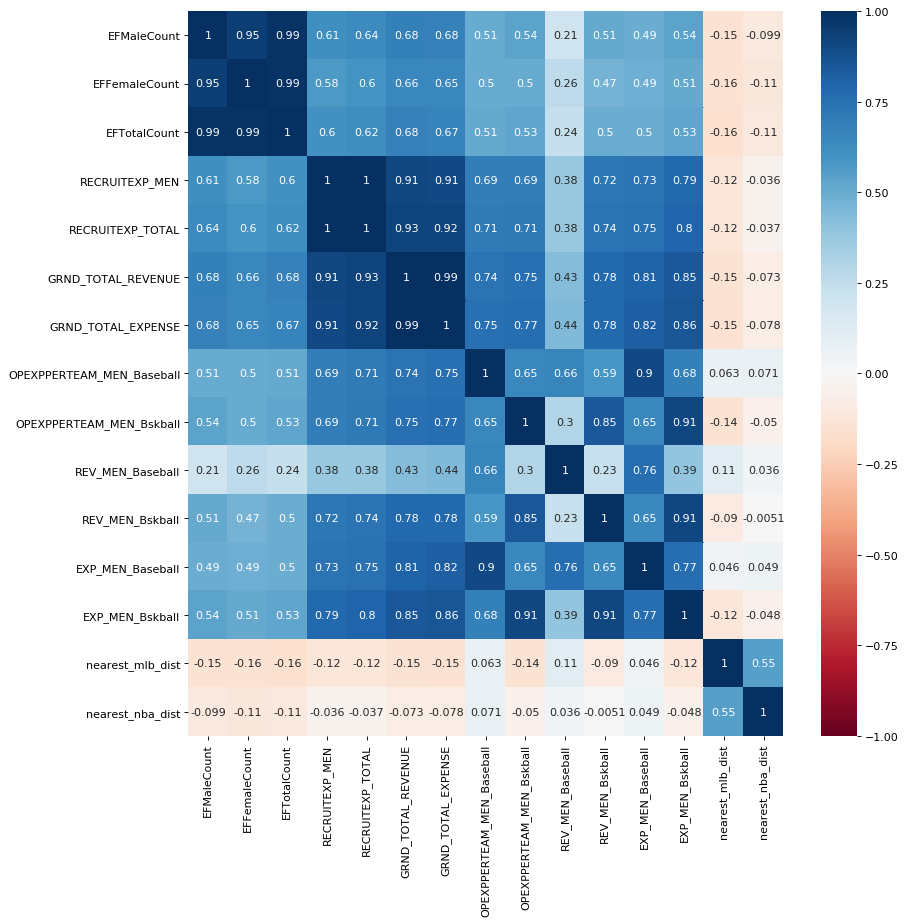

In [19]:
#Plot heatmap for only ncaa division I schools
figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(divI[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1)

mp.show()

In [20]:
#Group by region
divI_region = divI.groupby(divI['region']).mean()
divI_region

,unitid,zip_text,ClassificationCode,EFMaleCount,EFFemaleCount,EFTotalCount,sector_cd,RECRUITEXP_MEN,RECRUITEXP_TOTAL,GRND_TOTAL_REVENUE,...,OPEXPPERTEAM_MEN_Baseball,OPEXPPERTEAM_MEN_Bskball,REV_MEN_Baseball,REV_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball,lat,lon,nearest_mlb_dist,nearest_nba_dist
region,,,,,,,,,,,,,,,,,,,,,
ENC,174150.814815,2.334526e+07,1.296296,8357.481481,8564.555556,16922.037037,1.185185,800218.222222,1.105573e+06,6.573587e+07,...,460193.192308,1.233937e+06,8.732598e+05,8.888043e+06,1.516095e+06,5.551093e+06,40.795656,-86.108013,81.472393,84.105053
ESC,167423.966667,3.820990e+04,1.533333,4498.366667,5693.733333,10192.100000,1.033333,654912.233333,8.865654e+05,4.757742e+07,...,535663.142857,8.974791e+05,1.455024e+06,6.856937e+06,1.936988e+06,4.882550e+06,34.877644,-86.962048,189.855892,138.787218
MA,201702.608696,1.402835e+04,1.782609,5422.565217,5610.739130,11033.304348,1.739130,586201.173913,8.239018e+05,4.164173e+07,...,273048.125000,8.731277e+05,9.400212e+05,5.134964e+06,9.859470e+05,4.102929e+06,41.067103,-75.771780,58.857227,72.172025
MNT,172223.190476,2.851617e+07,1.380952,7818.095238,8327.476190,16145.571429,1.047619,577790.571429,8.184243e+05,4.507417e+07,...,474433.000000,9.010551e+05,1.176913e+06,5.179805e+06,1.760227e+06,4.293124e+06,39.690350,-111.166672,253.066330,157.919960
NE,168665.285714,3.831429e+03,1.785714,4375.428571,4600.857143,8976.285714,1.571429,526278.285714,7.585954e+05,3.640106e+07,...,294921.461538,7.378789e+05,9.428116e+05,2.909828e+06,9.418263e+05,2.880755e+06,42.310192,-71.725662,64.096152,66.240952
PAC,160983.823529,9.503371e+04,1.352941,9369.941176,11030.647059,20400.588235,1.176471,753556.352941,1.078675e+06,6.853344e+07,...,660248.800000,1.110980e+06,1.477732e+06,5.435450e+06,2.334393e+06,5.363245e+06,39.499146,-120.410194,95.053540,90.126407
SA,188672.844828,2.760226e+04,1.517241,5912.155172,7051.965517,12964.120690,1.327586,699340.344828,9.327378e+05,5.007307e+07,...,434925.648148,9.788005e+05,1.502479e+06,5.503348e+06,1.832815e+06,4.647463e+06,34.694423,-80.118334,137.749258,92.836384
WNC,177018.785714,5.850500e+04,1.500000,7159.214286,7294.000000,14453.214286,1.071429,924580.714286,1.271958e+06,6.557008e+07,...,628169.222222,1.280004e+06,8.084024e+05,8.406391e+06,1.948408e+06,5.552420e+06,42.137454,-94.464504,157.381442,216.585473
WSC,194447.216216,7.485930e+04,1.405405,5928.405405,7009.594595,12938.000000,1.243243,724030.810811,9.634106e+05,5.263903e+07,...,605031.787879,9.337630e+05,1.907959e+06,5.209861e+06,2.154803e+06,4.531020e+06,31.848459,-95.287363,164.456487,94.440658


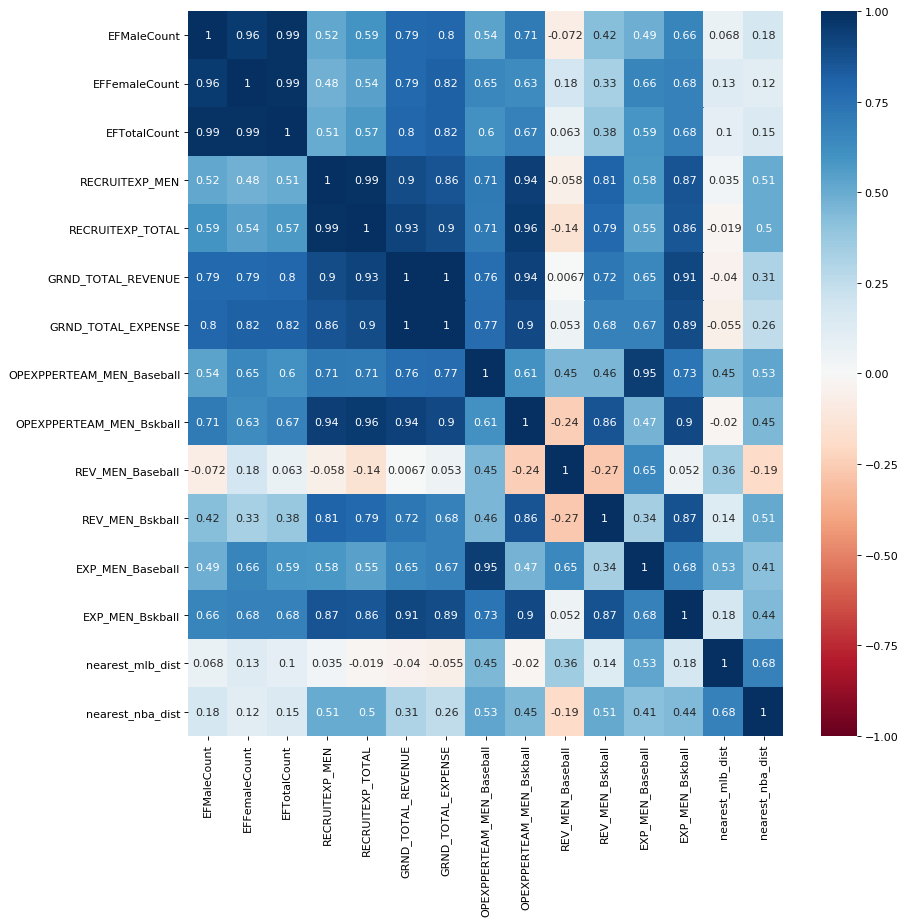

In [21]:
#Create heatmap for ncaa division 1 grouped by region
figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(divI_region[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1)

mp.show()

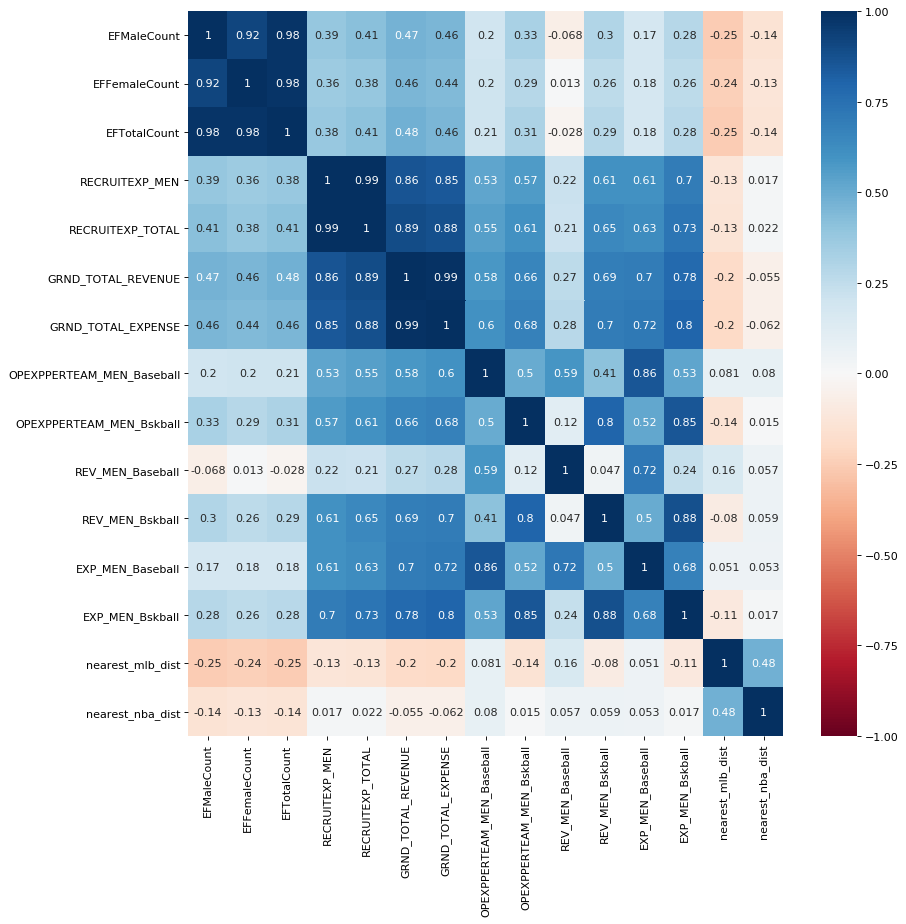

In [22]:
#Create heatmap for ncaa d1 FBS schools 
divI_fbs = joined_df.loc[joined_df['classification_name'] == 'NCAA Division I-FBS']

figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(divI_fbs[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1)

# displaying heatmap
mp.show()

In [23]:
#Group fbs schools by region
divI_fbs_region = divI_fbs.groupby(divI['region']).mean()
divI_fbs_region

,unitid,zip_text,ClassificationCode,EFMaleCount,EFFemaleCount,EFTotalCount,sector_cd,RECRUITEXP_MEN,RECRUITEXP_TOTAL,GRND_TOTAL_REVENUE,...,OPEXPPERTEAM_MEN_Baseball,OPEXPPERTEAM_MEN_Bskball,REV_MEN_Baseball,REV_MEN_Bskball,EXP_MEN_Baseball,EXP_MEN_Bskball,lat,lon,nearest_mlb_dist,nearest_nba_dist
region,,,,,,,,,,,,,,,,,,,,,
ENC,181884.526316,49169.315789,1.0,10419.105263,10492.368421,20911.473684,1.105263,1.039167e+06,1.417897e+06,8.424026e+07,...,536793.777778,1.453030e+06,8.282531e+05,1.071658e+07,1.729647e+06,6.572535e+06,41.199644,-85.422967,73.733238,76.477521
ESC,163747.357143,38312.142857,1.0,6844.571429,8327.642857,15172.214286,1.071429,1.250532e+06,1.678781e+06,8.765182e+07,...,916679.071429,1.606102e+06,2.263182e+06,1.297745e+07,3.234000e+06,8.907195e+06,34.554297,-87.041115,196.695246,133.326573
MA,201999.400000,14465.800000,1.0,13596.000000,13238.200000,26834.200000,1.200000,1.230064e+06,1.631149e+06,8.888354e+07,...,565605.500000,1.533726e+06,1.323839e+06,1.260758e+07,1.845554e+06,7.863152e+06,41.465631,-76.481300,75.467382,78.947501
MNT,175132.307692,84960.923077,1.0,9914.153846,10068.538462,19982.692308,1.076923,7.970849e+05,1.110724e+06,6.140358e+07,...,503143.111111,1.188943e+06,1.249362e+06,7.326510e+06,1.897488e+06,5.835329e+06,38.224670,-110.665728,220.302021,130.524778
NE,153524.333333,3246.333333,1.0,8184.333333,8358.666667,16543.000000,1.333333,9.149693e+05,1.251598e+06,6.726049e+07,...,520460.333333,1.874502e+06,1.551371e+06,6.859097e+06,1.551371e+06,6.741384e+06,42.177037,-71.983519,48.933885,50.990989
PAC,167063.818182,94765.090909,1.0,10325.818182,11855.909091,22181.727273,1.181818,1.038240e+06,1.467204e+06,9.228495e+07,...,778314.818182,1.455634e+06,1.512192e+06,7.236115e+06,2.680366e+06,7.124525e+06,39.391665,-120.516684,86.699962,87.445009
SA,182896.821429,28714.357143,1.0,9417.107143,10783.178571,20200.285714,1.142857,1.205918e+06,1.585125e+06,8.213020e+07,...,632992.535714,1.530964e+06,2.007500e+06,8.937454e+06,2.652961e+06,7.185788e+06,33.873807,-80.652599,137.709141,95.602567
WNC,164557.571429,60579.714286,1.0,10926.857143,10807.571429,21734.428571,1.000000,1.631403e+06,2.200565e+06,1.116018e+08,...,820306.000000,2.043812e+06,8.270840e+05,1.470920e+07,2.537092e+06,8.988244e+06,40.939292,-94.182696,121.152621,224.015760
WSC,198631.500000,75075.863636,1.0,8346.954545,9161.545455,17508.500000,1.272727,1.104761e+06,1.462315e+06,7.844605e+07,...,925426.833333,1.372110e+06,2.797497e+06,7.908123e+06,3.253538e+06,6.771296e+06,32.295051,-95.979302,167.241533,93.938567


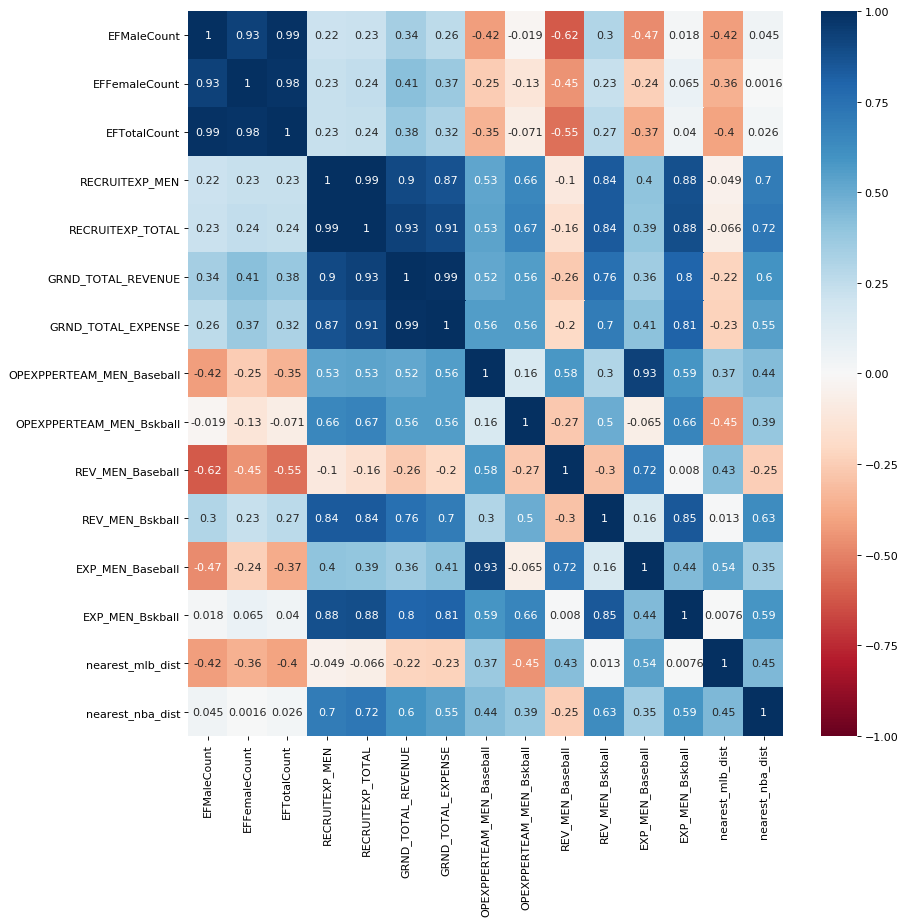

In [24]:
#Create heatmap for d1 fbs schools grouped by region
figure(figsize = (12,12), dpi = 80)

dataplot = sb.heatmap(divI_fbs_region[['EFMaleCount', 'EFFemaleCount', 'EFTotalCount', 'RECRUITEXP_MEN', 'RECRUITEXP_TOTAL',
       'GRND_TOTAL_REVENUE', 'GRND_TOTAL_EXPENSE', 'OPEXPPERTEAM_MEN_Baseball',
       'OPEXPPERTEAM_MEN_Bskball', 'REV_MEN_Baseball', 'REV_MEN_Bskball',
       'EXP_MEN_Baseball', 'EXP_MEN_Bskball', 'nearest_mlb_dist', 'nearest_nba_dist']].corr(), 
        cmap="RdBu", annot=True, vmin = -1)

# displaying heatmap
mp.show()